## Import libraries

In [1]:
from pathlib import Path
import os, sys

SRC_DIR = str(Path('.').resolve().parents[0])
if str(SRC_DIR) not in sys.path:
    sys.path.append(str(SRC_DIR))

import utils

if False: ## Set to true if you want the LaTeX syntax for plots [need LaTeX installed]
    import matplotlib
    matplotlib.rcParams.update({
        "text.usetex": True,
        "font.family": "serif",
        "font.serif": ["Times New Roman"],
    })

## Initialize $\chi^2$ calculator

In [10]:
# You can initialize the chi2 calculator as following:

chi2_calculator = utils.Chi2Calculator(N=50, is_highres=True, rsd=True, pantheon=True, bao=True, desy3=False)

# You can set to false the flags of the data you do not want to combine with the others.
# /!\ The desy3=True flag is not the final version, you can use it but it will just use a likelihood file.

## Calculate $\chi^2$ grids

In [11]:
# Calculating all the grids is not necessary, you can calculate only one grid to plot it if you want.

chi2_calculator(id_grid=1)
chi2_calculator(id_grid=2)
chi2_calculator(id_grid=3)

# It can take a while depending on the precision (N) you want and on how much chi2 values you want to combine.

# I personally use N between 50 to 100 with is_highres=True, but you are free to try other values.

# You can change the meaning of is_highres=True in utils/constants.py to zoom-in / zoom-out more.

# Tip: try first to run chi2_calculator(id_grid) for only 1 grid with a low N,
# in order to "initialize" the function as they run under Numba's JIT (@njit) compiler.
# Then you can run your calculation of chi2 with the N you wanted and it will be faster.

## Save grids

In [12]:
# If you want to save one or many grids, you can just call:

chi2_calculator.save_grid(id_grid=1)
chi2_calculator.save_grid(id_grid=2)
chi2_calculator.save_grid(id_grid=3)

# As the calculation of the grids can take a while, the save_grid method is independend,
# so as you can decide to save the grid later or not.

# It will be saved as a .npz file in output/chi2/FOLDER/RES/chi2_gridi.npz
#   FOLDER is named according to your chi2 calculator.
#       For instance, if you used 3 differents chi2 (Rsd, Pantheon and Bao), FOLDER will be named: 3-BPR
#   RES is highres or lowres depending the value of the boolean is_highres

## Plot grids

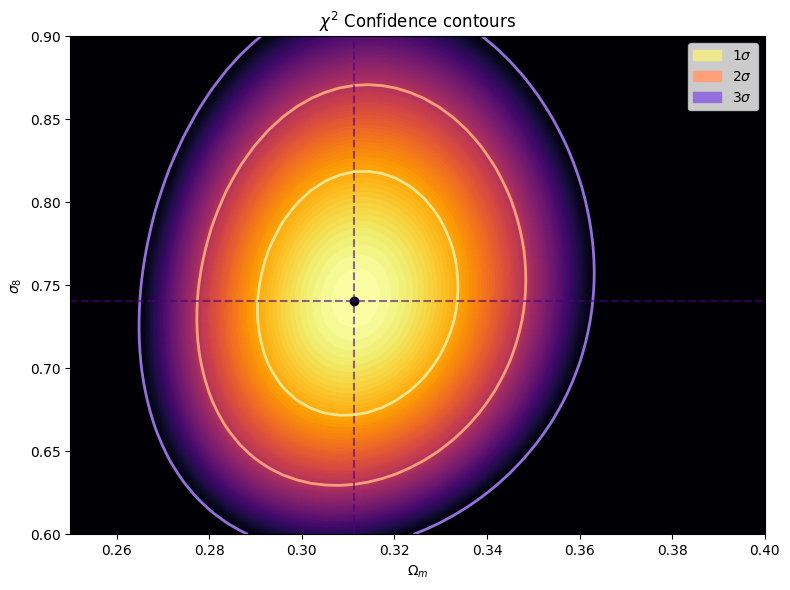

In [16]:
# If you want to plot a single grid, you can call:

chi2_calculator.plot_grid(id_grid=1, display_best_chi2=True, savefig=True)

# You can save the plot by setting savefig=True, and plot the minimizer point with display_best_chi2=True

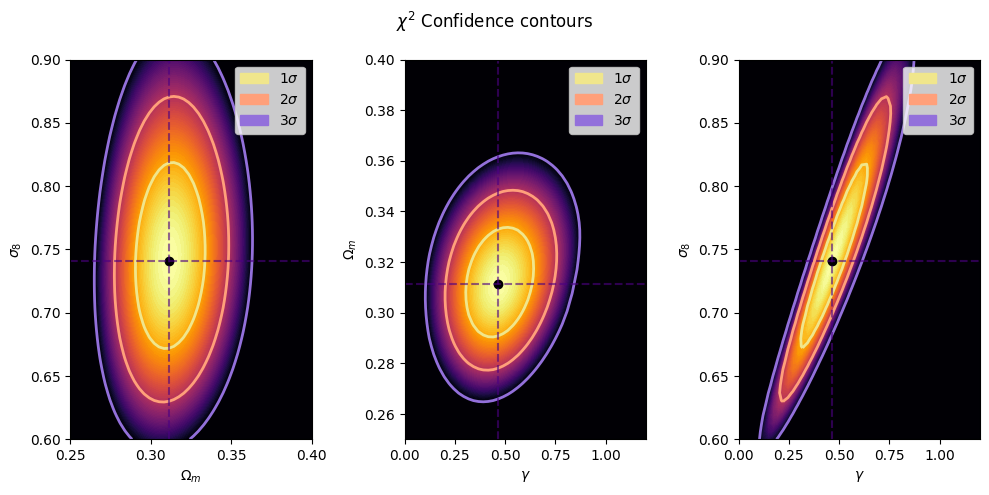

In [15]:
# To plot all the grids, use:

chi2_calculator.plot_grids(savefig=True)